## Изменения и комментарии по коду:
1. Увеличили количество нейронов на первом слое (с 64 до 128): Увеличение количества нейронов увеличивает емкость модели, что может помочь ей извлечь более сложные и абстрактные признаки из входных данных. В случае с изображениями MNIST, увеличение количества нейронов может помочь модели более эффективно выявлять различные формы и структуры цифр.
2. Сохранили количество нейронов на втором слое (64): Такое количество нейронов на втором слое (в соотношении с первым слоем) помогает снизить сложность модели и упростить ее обучение. Это может предотвратить переобучение, особенно при наличии большого количества нейронов на первом слое. Упрощение модели также может ускорить ее обучение и предсказания.
3. Увеличили количества эпох (с 5 до 10): Увеличение количества эпох позволяет модели сделать больше итераций по тренировочным данным и лучше сойтись к оптимальным весам. Большее количество эпох может улучшить точность модели, особенно при сложных задачах распознавания, таких как классификация цифр MNIST.
4. Увеличили размера пакета (с 32 до 128): Увеличение размера пакета позволяет модели использовать более объемные данные для обновления весов, что может ускорить обучение и повысить стабильность обновления градиента. Больший размер пакета может также привести к более гладкой и стабильной сходимости модели.
5. Добавили валидационную выборку (20% от обучающих данных): Добавление валидационной выборки помогает контролировать процесс обучения и предотвращать переобучение модели. Валидационная выборка позволяет оценить производительность модели на данных, которые она ранее не видела, и принимать решения по регуляризации или ранней остановке обучения.
6. Визуализировали точность обучения и потерь: Визуализация графиков точности и потерь помогает визуально оценить процесс обучения модели. Это позволяет наблюдать тренды и сравнивать производительность на обучающих и валидационных данных. Визуализация может помочь в определении переобучения или недообучения модели.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Загрузка и предобработка данных
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [3]:
# Создание модели
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),  # Увеличение количества нейронов на первом слое
  Dense(64, activation='relu'),  # Уменьшение количества нейронов на втором слое
  Dense(10, activation='softmax'),
])

In [4]:
# Компиляция модели
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Обучение модели
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,  # Увеличение количества эпох для более точного обучения
  batch_size=128,  # Увеличение размера пакета для более эффективного обучения
  validation_split=0.2,  # Добавление валидационной выборки для контроля процесса обучения
)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.4650 - accuracy: 0.8649 - val_loss: 0.2856 - val_accuracy: 0.9171
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.9294 - val_loss: 0.1936 - val_accuracy: 0.9438
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1745 - accuracy: 0.9469 - val_loss: 0.1560 - val_accuracy: 0.9552
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1371 - accuracy: 0.9587 - val_loss: 0.1512 - val_accuracy: 0.9563
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9648 - val_loss: 0.1359 - val_accuracy: 0.9585
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9701 - val_loss: 0.1257 - val_accuracy: 0.9603
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9735 - val_loss: 0.1318 - val_accuracy: 0.9597
Epoch 

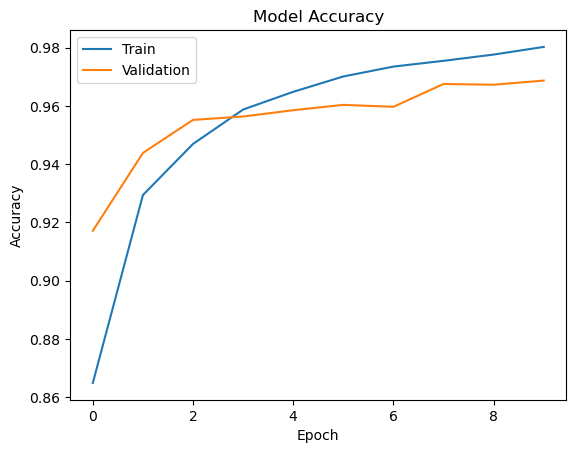

In [6]:
# Визуализация точности обучения и потерь
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

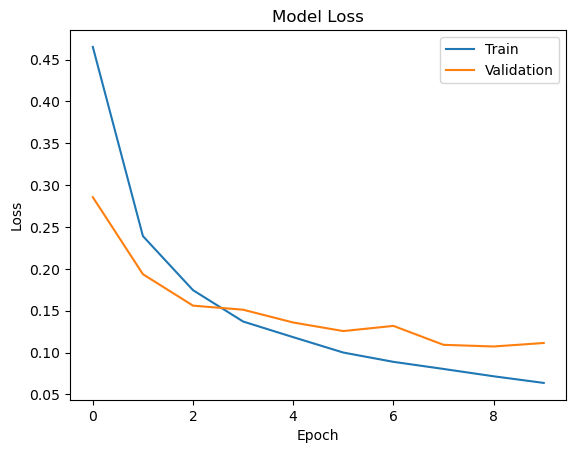

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
# Оценка модели на тестовых данных
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9712


[0.10055955499410629, 0.9711999893188477]

In [9]:
# Предсказание на первых 5 тестовых изображениях
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 59ms/step


In [10]:
# Вывод предсказаний модели
print(np.argmax(predictions, axis=1))  # [7, 2, 1, 0, 4]

[7 2 1 0 4]


In [11]:
# Проверка предсказаний с истинными значениями
print(test_labels[:5])  # [7, 2, 1, 0, 4]

[7 2 1 0 4]


In [12]:
# Сохранение модели на диск
# model.save("model.h5")